###Project Name - Yes Bank Stock Closing Price Prediction

Project Type - Linear Regression
Contribution - Individual

###Project Summary

Analysis and Prediction of Yes Bank Stock Prices - Yes Bank, a prominent player in the Indian financial sector, has been under scrutiny since 2018 due to a high-profile fraud case involving its co-founder, Rana Kapoor. This event, among other factors, has significantly influenced the bank's stock prices. The dataset here comprises monthly stock prices, including opening, closing, highest, and lowest prices since the bank's inception. The primary goal is to predict the monthly closing stock prices and identify key features influencing these predictions.
The dataset includes monthly stock prices of Yes Bank with the following columns:

  Date: Month and year of the recorded prices

  Open: Opening stock price of the month

  High: Highest stock price of the month

  Low: Lowest stock price of the month

  Close: Closing stock price of the month
  
Data analysis for missing values and did bivariate analysis to see the pattern of the data.
I proceeded with the linear regression analysis, we'll:

     Convered the Date column to a datetime format.
     Extract useful features such as year and month from the Date.
     Performed a linear regression to predict the Close price.
     Evaluate feature importance based on the regression coefficients.


I checked Model Performance or model evaluation, Feature Importance, Interpretation of Feature Importance for the above data and did prediction of closing prices

###Lets start

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df= pd.read_csv('/content/drive/MyDrive/Data/data_YesBank_StockPrices.csv')

In [ ]:
#top 5 rows
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
#last 5 rows
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
# Display the shape of the dataset
df.shape

(185, 5)

In [ ]:
# Get a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64



Preprocess Data:


In [ ]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

In [ ]:
# Extract year and month as new features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

Feature engineering

In [ ]:

# Select features and target variable
features = ['Open', 'High', 'Low', 'Year', 'Month']
target = 'Close'

Find correlation

In [ ]:
df.corr()

,Date,Open,High,Low,Close,Year,Month
Date,1.000000,0.623355,0.637128,0.597551,0.606019,0.997935,0.001183
Open,0.623355,1.000000,0.993040,0.983978,0.977971,0.624325,-0.034239
High,0.637128,0.993040,1.000000,0.983422,0.985051,0.638603,-0.042511
Low,0.597551,0.983978,0.983422,1.000000,0.995358,0.599056,-0.041818
Close,0.606019,0.977971,0.985051,0.995358,1.000000,0.608408,-0.055796
Year,0.997935,0.624325,0.638603,0.599056,0.608408,1.000000,-0.063055
Month,0.001183,-0.034239,-0.042511,-0.041818,-0.055796,-0.063055,1.000000


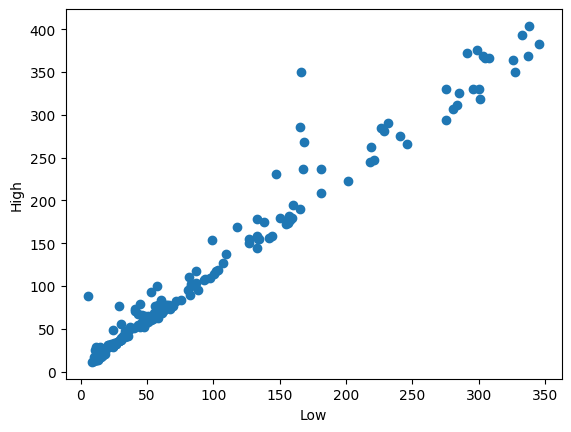

In [ ]:
#scatterplot
plt.scatter(df['Low'],df['High'])
plt.xlabel('Low')
plt.ylabel('High')
plt.show()

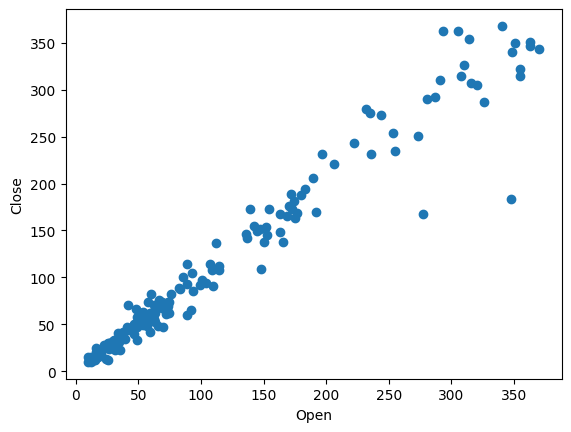

In [ ]:
#scatterplot
plt.scatter(df['Open'],df['Close'])
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

Split data

In [ ]:
# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train

In [ ]:
  #train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Make prediction

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

Model performance or model evaluation

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

feature importance

In [ ]:
# Get feature importances (coefficients)
feature_importances = pd.Series(model.coef_, index=features)

In [ ]:
#intercept term
intercept = model.intercept_

In [ ]:
# Combine actual and predicted values for comparison
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

Print the evaluation metrics and feature importances

In [ ]:
# Print the evaluation metrics and feature importances
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print('Intercept:', intercept)
print("\nFeature Importances (Coefficients):")
print(feature_importances)

Mean Squared Error (MSE): 84.01889739942447
R-squared (R²): 0.9907046745006218
Intercept: -69.20066154384905

Feature Importances (Coefficients):
Open    -0.497835
High     0.532381
Low      0.998549
Year     0.035701
Month   -0.209939
dtype: float64


The high R² value indicates that the model explains approximately 99% of the variance in the closing prices, suggesting a very good fit to the data

Feature Importance

The importance of each feature is determined by the coefficients in the linear regression model. Here are the coefficients for each feature:

   Open: -0.498

   High: 0.532

   Low: 0.999

   Year: 0.036

   Month: -0.210

Interpretation of Feature Importance

Low Price (0.999): The lowest price of the month has the highest positive coefficient, indicating a strong influence on the closing price. A unit increase in the lowest price is associated with an almost equivalent increase in the closing price.


High Price (0.532): The highest price also positively impacts the closing price, though to a lesser extent compared to the lowest price.


Open Price (-0.498): The opening price has a negative coefficient, suggesting an inverse relationship with the closing price, though the magnitude is smaller.


Year (0.036): The year has a positive but relatively small impact, indicating a slight upward trend over the years.


Month (-0.210): The month has a negative coefficient, which may reflect seasonal variations in the stock price.

In [ ]:
#to see comparison
print(results.head())

     Actual   Predicted
19    28.63   31.113526
42    12.24   15.933046
156  367.90  373.490091
111  136.83  127.198122
148  306.80  314.581692


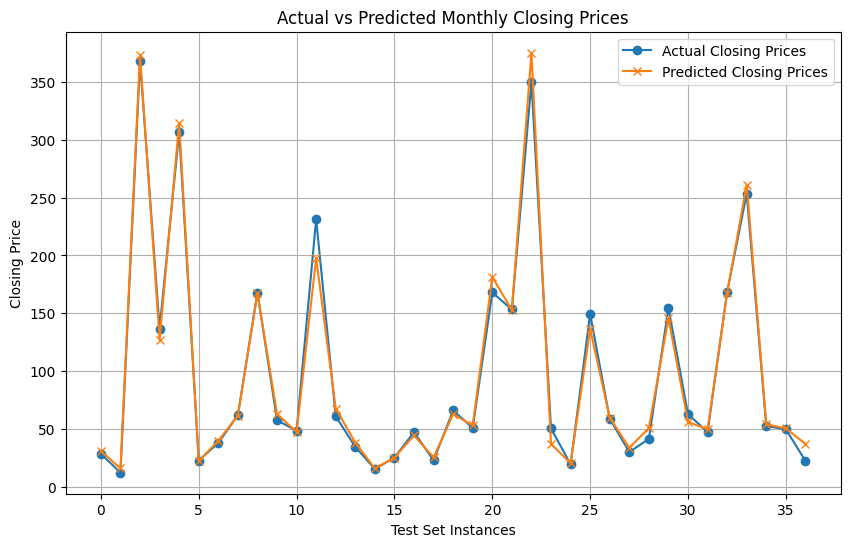

In [ ]:
#Plot actual vs predicted monthly closing prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Closing Prices', marker='o')
plt.plot(y_pred, label='Predicted Closing Prices', marker='x')
plt.title('Actual vs Predicted Monthly Closing Prices')
plt.xlabel('Test Set Instances')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

Conclusion

The linear regression model provides a strong predictive capability for the monthly closing prices of Yes Bank stock, with an R² of 0.99. The analysis reveals that the lowest and highest prices of the month are the most significant predictors, followed by the opening price. Temporal features like year and month also contribute, though to a lesser extent. These insights can help investors and analysts understand the key drivers of Yes Bank's stock price and make informed decisions.